<div class = "page-header">
    <h1 class = "alert alert-info">
    Reducing dimensionality and applying hierarchical clustering <br/>
    <small>
        Gabriel azevedo Ferreira - started 1-24-2017<br/>
        From : Reducing dimensionality and applying hierarchical clustering (Fiuzao)
    </small>
    </h1> 
</div>

<div class="alert alert-success">
    <h2>
        Imports
    </h2>
</div>
<h4 class="alert alert-warning">Importing libraries and checking working directory</h4>


## Basketbal positions
* **CenterCenter**: Usually the tallest player. Position demands a lot of physical contact. On offense, receives ball and shoots close to the basket. Serves as the last line of defense, blocking opponents’ shots and rebounding their misses.

* **Power Forward**: Tall player who relies on strength and toughness to control activity in the lane. Frequently rebounds, especially on defense. Has a decent shot from short-range and scores many points by rebounding missed shots and quickly shooting them.

* **Small Forward**: Versatile and very athletic player. Aggressively attacks the defense by driving and cutting towards the basket, but also has a consistent outside shot.

* **Shooting Guard**: A tenacious defender with an aptitude for stealing the ball. On offense, serves as the secondary ball handler and sharpshooter. Has the ability to convert shots from three-point range.

* **Point Guard**: Leader of offense who uses superb passing and dribbling skills to set up teammates for open shots. Has a reliable jump shot and ability to break down a defense by driving into the lane.

In [72]:
import pandas as pd
import numpy as np
import os
print os.getcwd();


# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab

#import libraries for features decomposition
import sklearn as sk

/home/jarvis/Documents/Git/TDA-NBA/notebooks


<h4 class="alert alert-warning"/> Setting up visualization parameters

In [19]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None


<h4 class="alert alert-warning"/>Importing Data

In [20]:
#import data
df = pd.read_csv('../Data/Dados.csv')
print "(rows,cols) =",df.shape
df.head(10)

(rows,cols) = (476, 29)


,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,+/-,PosicAbbrev
0,Aaron Brooks,CHI,31,69,36,33,1108,491,188,469,40.1,66,185,35.7,49,64,76.6,21,80,101,180,82,30,10,132,0,0,-10,PG
1,Aaron Gordon,ORL,20,78,32,46,1863,719,274,579,47.3,42,142,29.6,129,193,66.8,154,353,507,128,66,59,55,153,12,0,-76,PF
2,Aaron Harrison,CHA,21,21,15,6,93,18,5,19,26.3,3,10,30.0,5,12,41.7,4,11,15,2,4,6,0,10,0,0,-7,SG
3,Adreian Payne,MIN,25,52,18,34,486,132,53,145,36.6,9,32,28.1,17,26,65.4,20,91,111,29,36,16,11,77,0,0,-120,PF
4,Al Horford,ATL,30,82,48,34,2631,1249,529,1048,50.5,88,256,34.4,103,129,79.8,148,448,596,263,107,68,121,163,17,0,231,C
5,Al Jefferson,CHA,31,47,33,14,1096,562,245,505,48.5,0,0,0.0,72,111,64.9,57,244,301,70,34,30,41,117,7,0,46,C
6,Al-Farouq Aminu,POR,25,82,44,38,2341,839,299,719,41.6,126,349,36.1,115,156,73.7,98,401,499,138,120,72,53,171,8,0,58,SF
7,Alan Anderson,WAS,33,13,8,5,192,65,21,59,35.6,12,37,32.4,11,15,73.3,1,26,27,14,2,4,1,25,0,0,30,SG
8,Alan Williams,PHX,23,10,3,7,68,29,10,24,41.7,0,0,0.0,9,14,64.3,14,24,38,5,6,4,5,15,1,0,1,PF
9,Alec Burks,UTA,24,31,13,18,797,412,137,334,41.0,32,79,40.5,106,141,75.2,16,93,109,63,51,18,4,71,0,0,-13,SG


<h4 class = "alert alert-warning"/> Assign position label for each player <br/> Also taking only numeric values

In [21]:
dict = {' PG': 1, ' PF': 2, ' SG' : 3, ' SF' : 4, ' C' : 5}
position_labels = [dict[x] for x in df['PosicAbbrev']]
df_numVar = df.select_dtypes(include=['number']) 

<h2 class="alert alert-success">
        Performing PCA (dim. reduction)
</h2>
<h4 class = "alert alert-warning"/>Scaling data

In [78]:
df_scaled = sk.preprocessing.scale(df_numVar)


<h4 class = "alert alert-warning"/> Computing new coordinates

In [95]:
pca = sk.decomposition.PCA(n_components=10)
df_red = pca.fit_transform(df_scaled)

print pca.explained_variance_ratio_
print "variance sum =",sum(pca.explained_variance_ratio_)

[ 0.51156605  0.12971827  0.07015156  0.05783815  0.03923076  0.03341871
  0.02835647  0.02759115  0.02476175  0.01878446]
[ 13.3007172    3.37267513   1.82394063   1.50379182   1.01999975
   0.86888634   0.73726814   0.71736997   0.64380561   0.48839605]
variance sum = 0.941417332595


<h4 class = "alert alert-warning"/> 3D plotting

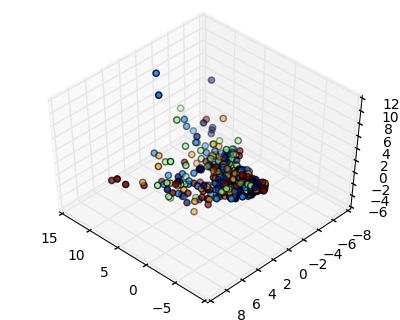

In [90]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df_red[:, 0], df_red[:, 1], df_red[:, 2], c=position_labels)

<h4 class = "alert alert-warning"/> 2D plotting

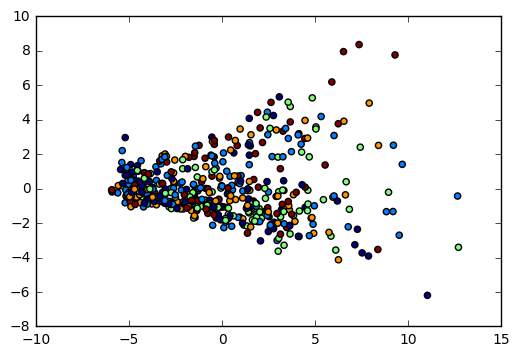

In [91]:
pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)
pylab.show()

In [94]:
#taking a look to the columns
columns = ["col "+str(i) for i in range(1,len(df_red[0])+1)]
pca_df = pd.DataFrame(data=df_red, columns=columns)
pca_df.head(10)

,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9,col 10
0,-0.203007,-1.561956,-0.340707,-0.870443,0.474703,0.655234,0.018228,0.387619,-0.127254,-0.256811
1,2.690069,1.862093,-1.369976,0.331125,-1.353612,0.400290,-0.095480,-0.529754,-0.020644,0.164741
2,-4.802161,-0.313981,0.728748,1.518884,-1.724496,0.427234,-1.084134,0.191974,-0.392406,-0.571136
3,-2.757773,0.005286,-0.933622,0.373413,-0.242243,0.793757,-0.253467,-0.142636,-0.274188,-0.196076
4,5.540853,1.372572,0.528470,-1.591608,-0.403160,0.012499,-0.961648,0.063383,0.405883,0.791518
5,-0.423872,1.843692,0.900314,-0.619226,0.691462,-0.769031,-0.090899,0.591177,-0.650635,-0.135740
6,3.839078,-0.351060,-0.632418,-0.755482,-1.266687,0.400670,-0.744594,0.129178,-0.376051,0.909873
7,-4.431256,-0.679072,1.100416,0.012358,0.948400,-0.099961,-1.244612,0.236218,0.636436,0.079334
8,-4.778378,0.727438,0.811653,1.248724,-0.106204,-0.923668,0.147292,-0.352072,-0.826366,0.379614
9,-1.867691,-0.778244,0.151574,0.897451,-0.373679,-0.447356,-0.240250,-0.694237,0.793563,-0.243715


<h4 class = "alert alert-warning">Repeting the previous PCA keeping into account only different positions <br/> TODO</h4>

In [144]:
dict = {' PG': 1, ' PF': 2, ' SG' : 3, ' SF' : 4, ' C' : 5}

for x in df['PosicAbbrev']:
    if dict[x] in [1,2,3,4,5] :
        pos.append(dict[x])
        
df2 = df[df['PosicAbbrev'].isin((' PG',' SG',' PF',' C',' SF'))]
        
print len(pos)
print df2.shape

476
(476, 29)


In [145]:
df2.shape

(476, 29)


<h1> Alerts Example</h1>


<div class="alert alert-success">
<h2>
Submit successfully!
</h2>
</div>

<div class="alert alert-info">
For more updates visit our offical forum.
</div>

<div class="alert alert-danger">
Error
</div>

<div class="alert alert-warning"> 
Don't use caps keys.
</div>
